# "Simulasi Monte Carlo untuk Estimasi Nilai Pi (π) dengan Visualisasi dan Analisis Konvergensi"

In [2]:
%pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


===== Simulasi Monte Carlo untuk Mengestimasi Nilai π =====
Nilai π sebenarnya: 3.1415926536

Menjalankan simulasi dengan 10,000 titik...
Estimasi π: 3.1928000000
Error relatif: 1.6299804608%

Membuat visualisasi simulasi...

Menganalisis konvergensi simulasi...


Analyzing convergence: 100%|██████████| 50/50 [00:00<00:00, 195.50it/s]



Membuat visualisasi konvergensi terpisah...

Simulasi selesai!
Hasil visualisasi disimpan sebagai:
1. 'monte_carlo_pi_simulation.png' - Visualisasi simulasi Monte Carlo
2. 'konvergensi_estimasi_pi.png' - Grafik konvergensi estimasi π
3. 'error_relatif_vs_jumlah_titik.png' - Grafik error relatif
4. 'waktu_eksekusi_vs_jumlah_titik.png' - Grafik waktu eksekusi


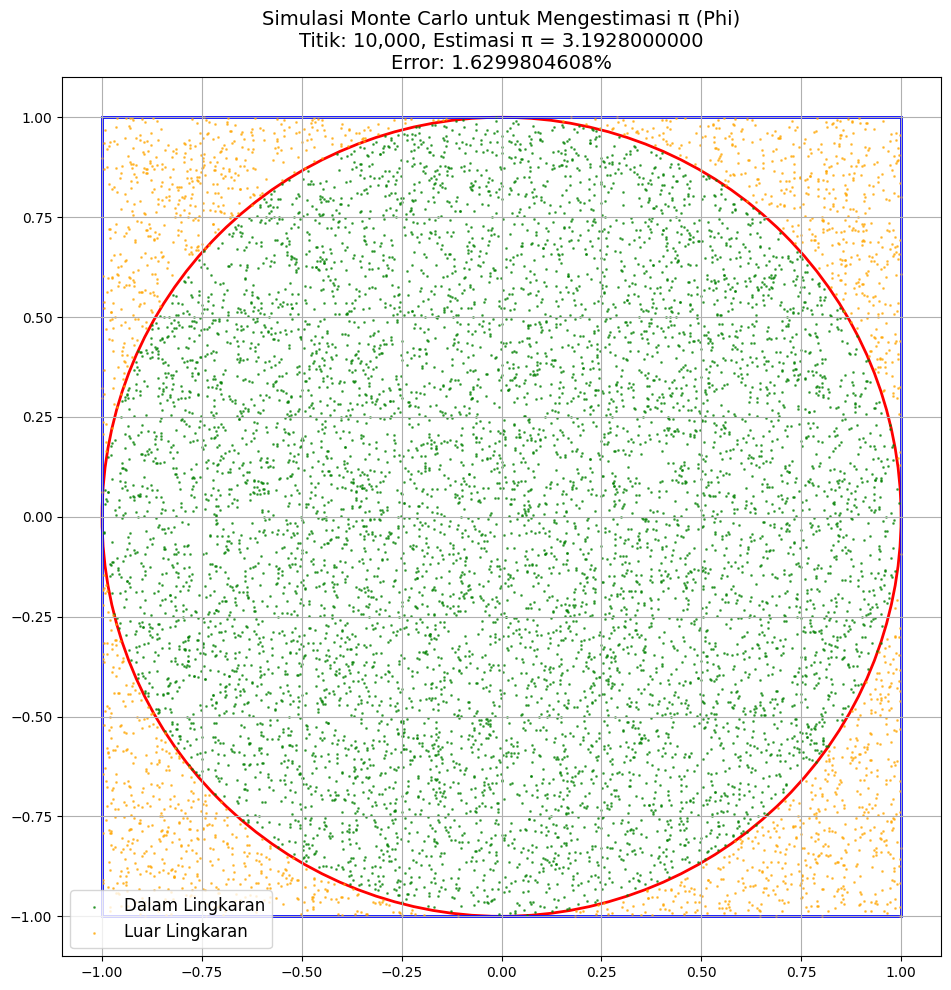

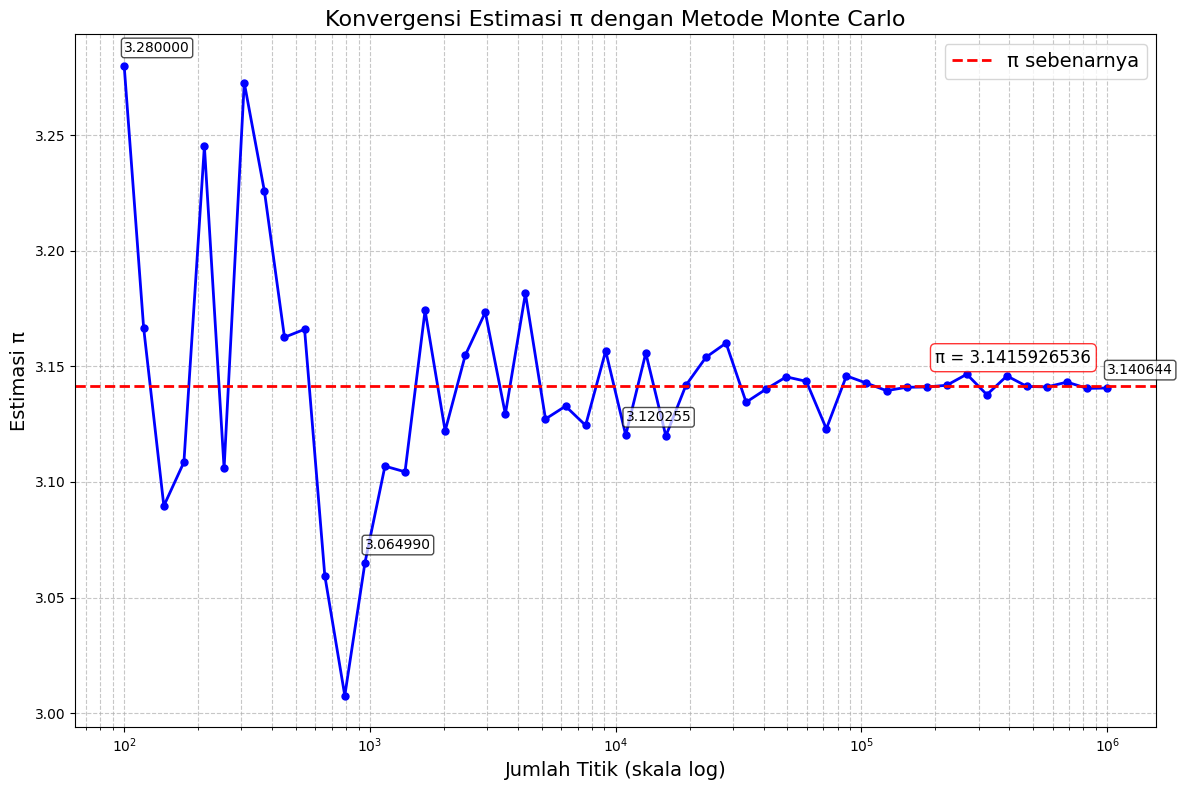

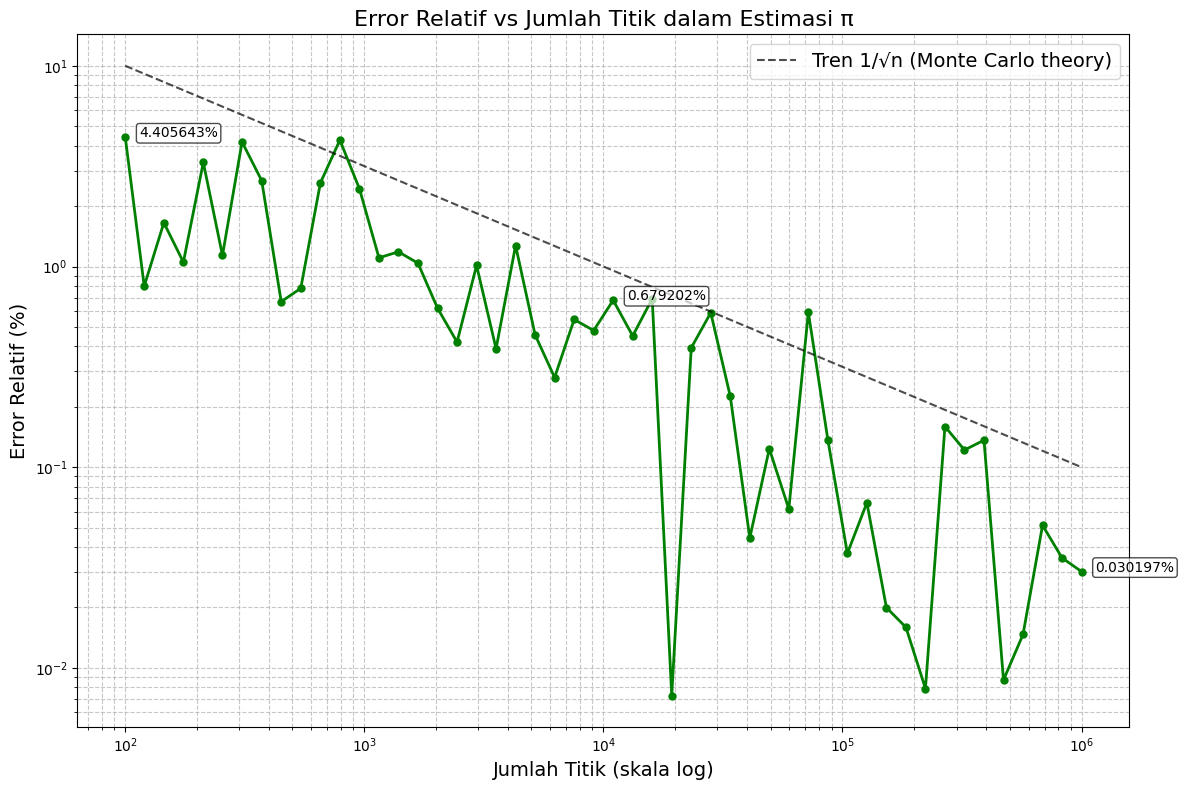

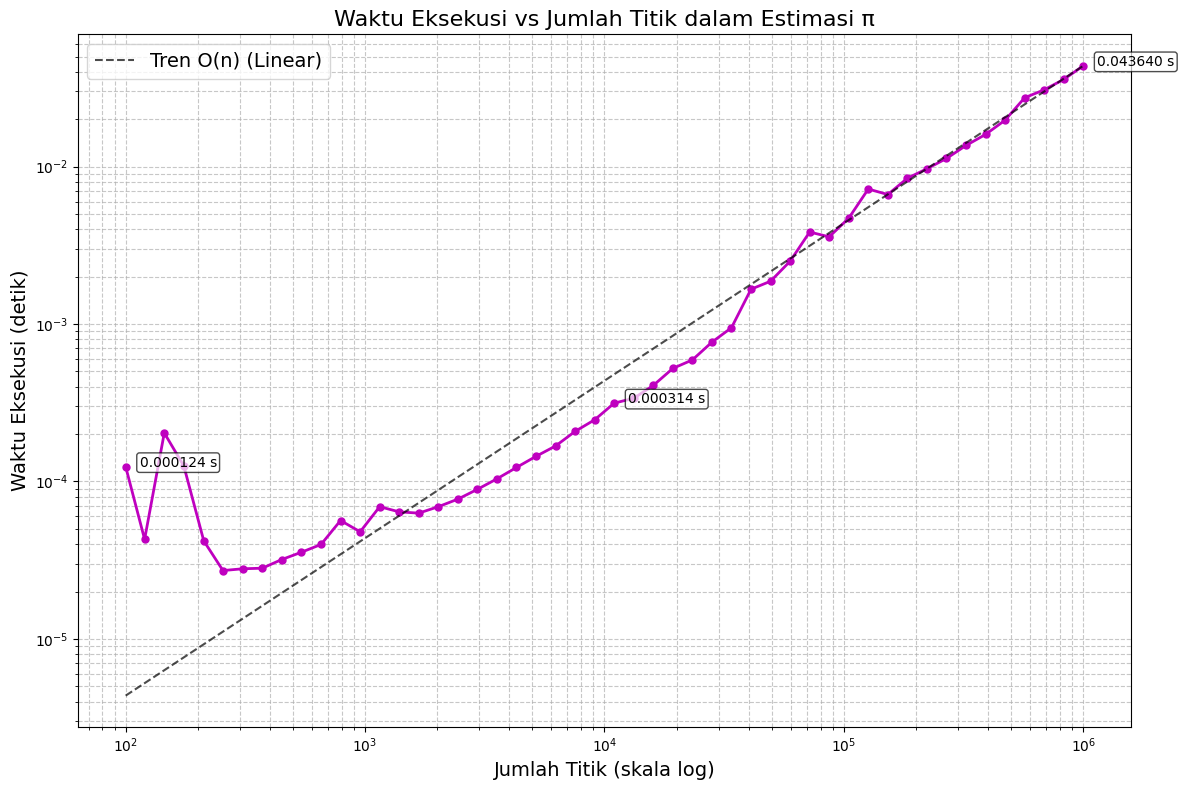

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import time
from tqdm import tqdm

def estimate_pi(num_points):
    """
    Mengestimasi nilai pi menggunakan metode Monte Carlo
    dengan menghitung rasio titik dalam lingkaran dengan total titik
    
    Args:
        num_points: Jumlah titik acak yang akan digunakan
        
    Returns:
        estimated_pi: Estimasi nilai pi
        points_inside: Array berisi titik-titik dalam lingkaran
        points_outside: Array berisi titik-titik luar lingkaran
    """
    # Menghasilkan titik acak (x,y) dalam persegi dengan sisi 2 (-1 sampai 1)
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    
    # Menghitung jarak titik dari pusat (0,0)
    distance = np.sqrt(x**2 + y**2)
    
    # Memeriksa titik mana yang berada dalam lingkaran (jari-jari = 1)
    inside_circle = distance <= 1
    
    # Menghitung rasio titik dalam lingkaran 
    ratio = np.sum(inside_circle) / num_points
    estimated_pi = 4 * ratio
    
    # Memisahkan titik dalam dan luar lingkaran untuk visualisasi
    points_inside = np.array([x[inside_circle], y[inside_circle]])
    points_outside = np.array([x[~inside_circle], y[~inside_circle]])
    
    return estimated_pi, points_inside, points_outside

def plot_simulation(points_inside, points_outside, estimated_pi, true_pi, num_points):
    """
    Memvisualisasikan hasil simulasi Monte Carlo
    
    Args:
        points_inside: Array berisi titik-titik dalam lingkaran
        points_outside: Array berisi titik-titik luar lingkaran
        estimated_pi: Nilai pi yang diestimasi
        true_pi: Nilai pi sebenarnya
        num_points: Jumlah titik yang digunakan
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Menggambar lingkaran dan persegi
    circle = Circle((0, 0), 1, fill=False, color='red', linewidth=2)
    square = Rectangle((-1, -1), 2, 2, fill=False, color='blue', linewidth=2)
    ax.add_patch(circle)
    ax.add_patch(square)
    
    # Menggambar titik-titik
    ax.scatter(points_inside[0], points_inside[1], color='green', s=1, alpha=0.6, label='Dalam Lingkaran')
    ax.scatter(points_outside[0], points_outside[1], color='orange', s=1, alpha=0.6, label='Luar Lingkaran')
    
    # Menampilkan informasi
    error_percent = abs(estimated_pi - true_pi) / true_pi * 100
    ax.set_title(f'Simulasi Monte Carlo untuk Mengestimasi π (Phi)\n'
                f'Titik: {num_points:,}, Estimasi π = {estimated_pi:.10f}\n'
                f'Error: {error_percent:.10f}%', fontsize=14)
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend(fontsize=12)
    
    plt.tight_layout()
    return fig

def run_convergence_analysis(max_points=1000000, steps=100):
    """
    Menganalisis konvergensi estimasi pi seiring bertambahnya jumlah titik
    
    Args:
        max_points: Jumlah maksimum titik
        steps: Jumlah langkah untuk analisis
        
    Returns:
        points_list: List jumlah titik untuk setiap langkah
        pi_estimates: List estimasi pi untuk setiap langkah
        errors: List error relatif untuk setiap langkah
        execution_times: List waktu eksekusi untuk setiap langkah
    """
    true_pi = np.pi
    points_list = np.logspace(2, np.log10(max_points), steps).astype(int)
    pi_estimates = []
    errors = []
    execution_times = []
    
    for n_points in tqdm(points_list, desc="Analyzing convergence"):
        start_time = time.time()
        est_pi, _, _ = estimate_pi(n_points)
        end_time = time.time()
        
        pi_estimates.append(est_pi)
        errors.append(abs(est_pi - true_pi) / true_pi * 100)
        execution_times.append(end_time - start_time)
    
    return points_list, pi_estimates, errors, execution_times

def plot_pi_convergence(points_list, pi_estimates):
    """
    Membuat plot konvergensi estimasi pi
    
    Args:
        points_list: List jumlah titik
        pi_estimates: List estimasi pi
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.semilogx(points_list, pi_estimates, 'b-', linewidth=2, marker='o', markersize=5)
    ax.axhline(y=np.pi, color='r', linestyle='--', linewidth=2, label='π sebenarnya')
    
    ax.set_xlabel('Jumlah Titik (skala log)', fontsize=14)
    ax.set_ylabel('Estimasi π', fontsize=14)
    ax.set_title('Konvergensi Estimasi π dengan Metode Monte Carlo', fontsize=16)
    ax.grid(True, which="both", linestyle="--", alpha=0.7)
    ax.legend(fontsize=14)
    
    # Menambahkan anotasi nilai π sebenarnya
    ax.annotate(f'π = {np.pi:.10f}', 
                xy=(points_list[-1]/5, np.pi+0.01), 
                fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))
    
    # Menambahkan anotasi untuk beberapa estimasi
    for i in [0, len(points_list)//4, len(points_list)//2, len(points_list)-1]:
        ax.annotate(f'{pi_estimates[i]:.6f}', 
                    xy=(points_list[i], pi_estimates[i]), 
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7))
    
    plt.tight_layout()
    return fig

def plot_error_convergence(points_list, errors):
    """
    Membuat plot konvergensi error relatif
    
    Args:
        points_list: List jumlah titik
        errors: List error relatif
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.loglog(points_list, errors, 'g-', linewidth=2, marker='o', markersize=5)
    
    # Menambahkan garis tren 1/sqrt(n)
    reference_line = 100 * 1 / np.sqrt(points_list)
    ax.loglog(points_list, reference_line, 'k--', alpha=0.7, 
              label='Tren 1/√n (Monte Carlo theory)')
    
    ax.set_xlabel('Jumlah Titik (skala log)', fontsize=14)
    ax.set_ylabel('Error Relatif (%)', fontsize=14)
    ax.set_title('Error Relatif vs Jumlah Titik dalam Estimasi π', fontsize=16)
    ax.grid(True, which="both", linestyle="--", alpha=0.7)
    ax.legend(fontsize=14)
    
    # Menambahkan anotasi untuk beberapa error
    for i in [0, len(points_list)//2, len(points_list)-1]:
        ax.annotate(f'{errors[i]:.6f}%', 
                    xy=(points_list[i], errors[i]), 
                    xytext=(10, 0),
                    textcoords='offset points',
                    fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7))
    
    plt.tight_layout()
    return fig

def plot_execution_time(points_list, execution_times):
    """
    Membuat plot waktu eksekusi
    
    Args:
        points_list: List jumlah titik
        execution_times: List waktu eksekusi
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.loglog(points_list, execution_times, 'm-', linewidth=2, marker='o', markersize=5)
    
    # Menambahkan garis tren O(n)
    trendline_factor = execution_times[-1] / points_list[-1]
    reference_line = trendline_factor * points_list
    ax.loglog(points_list, reference_line, 'k--', alpha=0.7, 
              label='Tren O(n) (Linear)')
    
    ax.set_xlabel('Jumlah Titik (skala log)', fontsize=14)
    ax.set_ylabel('Waktu Eksekusi (detik)', fontsize=14)
    ax.set_title('Waktu Eksekusi vs Jumlah Titik dalam Estimasi π', fontsize=16)
    ax.grid(True, which="both", linestyle="--", alpha=0.7)
    ax.legend(fontsize=14)
    
    # Menambahkan anotasi untuk beberapa waktu eksekusi
    for i in [0, len(points_list)//2, len(points_list)-1]:
        ax.annotate(f'{execution_times[i]:.6f} s', 
                    xy=(points_list[i], execution_times[i]), 
                    xytext=(10, 0),
                    textcoords='offset points',
                    fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7))
    
    plt.tight_layout()
    return fig

def main():
    # Parameter simulasi
    num_points = 10000
    true_pi = np.pi
    
    print("===== Simulasi Monte Carlo untuk Mengestimasi Nilai π =====")
    print(f"Nilai π sebenarnya: {true_pi:.10f}")
    
    # Menjalankan simulasi
    print(f"\nMenjalankan simulasi dengan {num_points:,} titik...")
    estimated_pi, points_inside, points_outside = estimate_pi(num_points)
    
    # Menampilkan hasil
    error = abs(estimated_pi - true_pi) / true_pi * 100
    print(f"Estimasi π: {estimated_pi:.10f}")
    print(f"Error relatif: {error:.10f}%")
    
    # Memvisualisasikan simulasi
    print("\nMembuat visualisasi simulasi...")
    fig1 = plot_simulation(points_inside, points_outside, estimated_pi, true_pi, num_points)
    plt.savefig('monte_carlo_pi_simulation.png', dpi=300)
    
    # Menganalisis konvergensi
    print("\nMenganalisis konvergensi simulasi...")
    points_list, pi_estimates, errors, execution_times = run_convergence_analysis(max_points=1000000, steps=50)
    
    # Membuat visualisasi konvergensi secara terpisah
    print("\nMembuat visualisasi konvergensi terpisah...")
    
    # Plot Konvergensi Estimasi Pi
    fig_pi = plot_pi_convergence(points_list, pi_estimates)
    plt.figure(fig_pi.number)
    plt.savefig('konvergensi_estimasi_pi.png', dpi=300)
    
    # Plot Error Relatif
    fig_error = plot_error_convergence(points_list, errors)
    plt.figure(fig_error.number)
    plt.savefig('error_relatif_vs_jumlah_titik.png', dpi=300)
    
    # Plot Waktu Eksekusi
    fig_time = plot_execution_time(points_list, execution_times)
    plt.figure(fig_time.number)
    plt.savefig('waktu_eksekusi_vs_jumlah_titik.png', dpi=300)
    
    print("\nSimulasi selesai!")
    print("Hasil visualisasi disimpan sebagai:")
    print("1. 'monte_carlo_pi_simulation.png' - Visualisasi simulasi Monte Carlo")
    print("2. 'konvergensi_estimasi_pi.png' - Grafik konvergensi estimasi π")
    print("3. 'error_relatif_vs_jumlah_titik.png' - Grafik error relatif")
    print("4. 'waktu_eksekusi_vs_jumlah_titik.png' - Grafik waktu eksekusi")
    
    # Menampilkan plot
    plt.show()

if __name__ == "__main__":
    main()